<a href="https://colab.research.google.com/github/LinCheungS/Example_ML_DL/blob/master/Tatanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 泰坦尼克生存预测

[titanic - kaggle](https://www.kaggle.com/c/titanic/data)

## 数据清洗

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
# 加载数据
train_data = pd.read_csv("train.csv")
print("数据的维度: ",train_data.shape)
train_data.head(1)

数据的维度:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [164]:
# 看缺失值,和数据类型
print(train_data.isnull().sum())
print("====================")
print(train_data.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


0    549
1    340
Name: Survived, dtype: int64


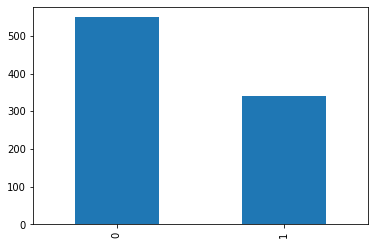

In [181]:
# 查看label 的 1和0比例
print(train_data["Survived"].value_counts())
train_data["Survived"].value_counts().plot(kind='bar')

In [177]:
# 利用drop函数，可以将一列的属性全部删除
print(train_data.shape)
train_data = train_data.drop('Cabin',axis=1)
train_data = train_data.drop(["Name","PassengerId"], axis=1) 
print(train_data.shape)

(889, 11)
(889, 9)


In [170]:
# 查看缺失值
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [171]:
# 对于需要填充的
# 查看没有缺失的在不同label下的分布情况
Survived_0_age = train_data[train_data["Survived"]==0]
Survived_1_age = train_data[train_data["Survived"]==1]
print(Survived_0_age["Age"].describe())
print("================")
print(Survived_1_age["Age"].describe())

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


In [174]:
# 根据缺失值得label,填充数据,省事就用fillna()
Survived_0_age_fill = (train_data["Survived"]==0) & (train_data["Age"].isnull())
for i,o in enumerate(Survived_0_age_fill):
  if o:
    train_data["Age"][i]=30.626179

Survived_1_age_fill = (train_data["Survived"]==1) & (train_data["Age"].isnull())
for i,o in enumerate(Survived_1_age_fill):
  if o:
    train_data["Age"][i]=28.34369
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [178]:
# 对于需要整行删除的hang
# 删除Embarked
train_data = train_data.dropna(subset=["Embarked"])
print(train_data.isnull().sum())
print(train_data.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
(889, 9)


In [179]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C


In [0]:
# 存入csv文件中
train_data.to_csv("aa.csv")

In [182]:
 # Ticket的权重
 train_data[train_data["Ticket"]=="1601"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
74,1,3,male,32.000000,0,0,1601,56.4958,S
169,0,3,male,28.000000,0,0,1601,56.4958,S
509,1,3,male,26.000000,0,0,1601,56.4958,S
643,1,3,male,28.343690,0,0,1601,56.4958,S
692,1,3,male,28.343690,0,0,1601,56.4958,S
826,0,3,male,30.626179,0,0,1601,56.4958,S
838,1,3,male,32.000000,0,0,1601,56.4958,S
